In [2]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Импортируем дата-сет жилья в бостоне для примера:

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\nvlysen2\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [3]:
# Преобразовываем данные в дата-фрейм
data = pd.DataFrame(boston.data)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# С помощью метода feature_names задаем имя столбцам
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Создаем целевой столбец, который будем предсказывать
data['price'] = boston.target

In [9]:
# Смотрим кол-во строк и столбцов:
data.shape

(506, 14)

In [10]:
# Смотрим типы данных:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [11]:
# смотрим кол-во уникальных значений:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
price      229
dtype: int64

In [12]:
# Смотрим кол-во нуллов в столбцах:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [13]:
data[data.isnull().any(axis = 1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price


In [14]:
# смотрим описательную статистику:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

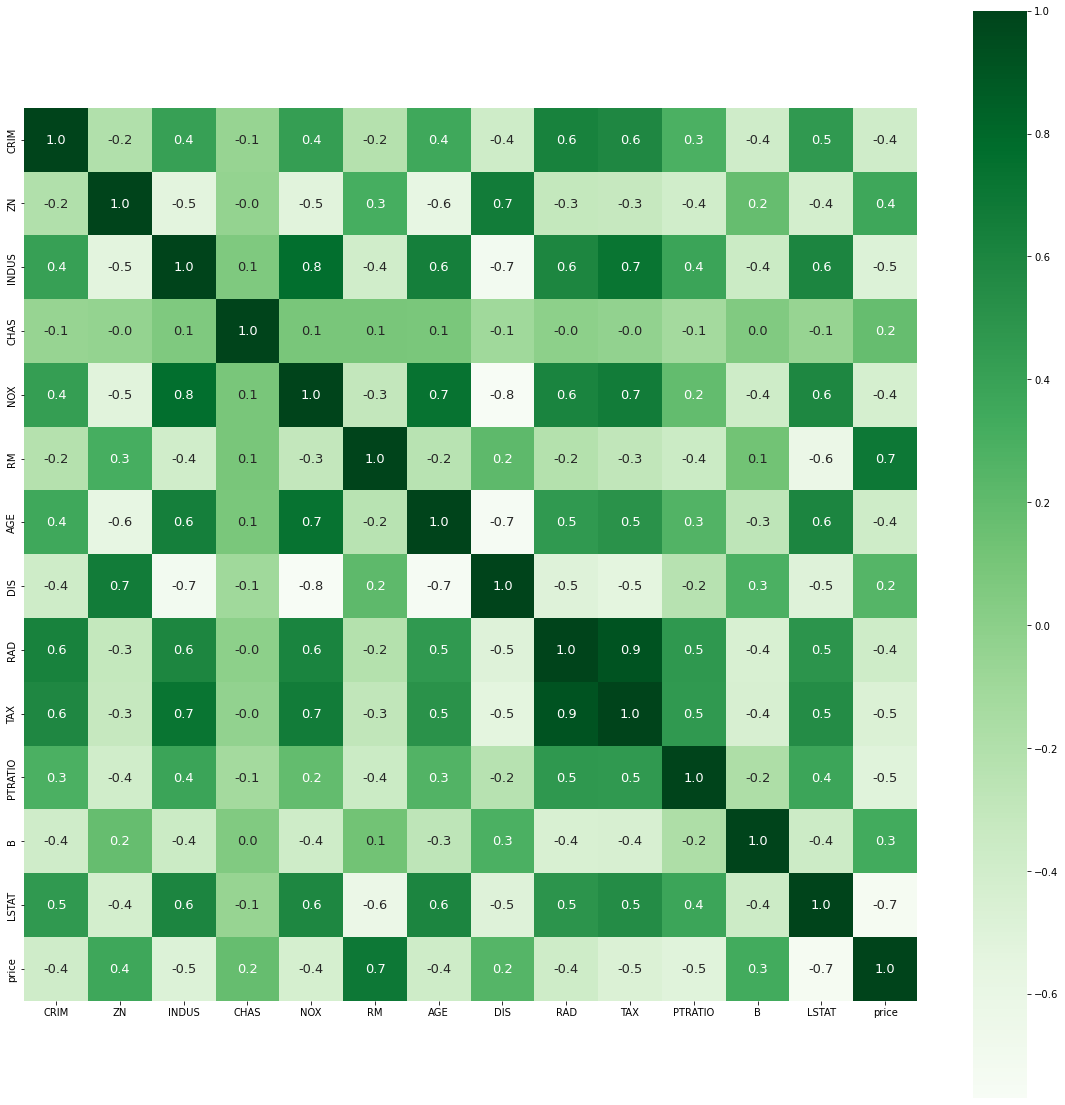

In [24]:
# Строим корреляционную матрицу, чтобы найти взаимосвязи фитчей:
corr = data.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr, cbar=True, square=True, fmt ='.1f', annot=True, annot_kws={'size': 13}, cmap='Greens')

## Обучение и прогнозирование модели:

In [25]:
# сплитуем данные:
# В переменной x оставляем только признаки
# В переменной y оставляем таргет-метрику
x = data.drop(['price'], axis = 1) # Удаляем столбец 'price'
y = data['price'] # Оставляем только столбец 'price'

In [26]:
# Импортируем метод train_test_split с помощью которого разбиваем 
# x и  y на трнировочную и тестовую выборку, 
# где аргумент test_size = 0.3, говорит о том, что размер тестовой выборки равен 30%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

In [29]:
# Импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# создаем переменную с линейной регрессией
lm = LinearRegression()

# Обучаем модель на тренировочной выборке
lm.fit(x_train, y_train)

LinearRegression()

In [30]:
lm.intercept_ # константа Альфа

36.357041376595205

In [32]:
# преобразуем коэффициенты линейной модели в дата-фрейм:
coefficients = pd.DataFrame([x_train.columns, lm.coef_]).T
coefficients = coefficients.rename(columns={0:'Attribute', 1:'Coefficients'})
coefficients
# Коэффициенты это наши Бетта иттые

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


In [34]:
# Делаем предсказательную модель на  тренировочном сете:
# Обучно в дата-саенс так не делают. Обычно на тренинговой учаться. а на тестовой сравниваются
y_pred = lm.predict(x_train)

In [35]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))

R^2: 0.7465991966746854
MAE: 3.08986109497113
MSE: 19.07368870346903


## Визуальная оценка качества модели:

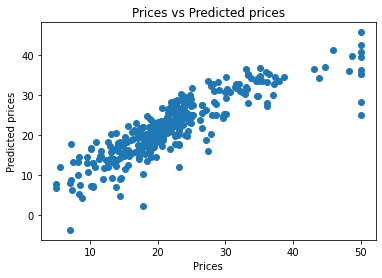

In [36]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

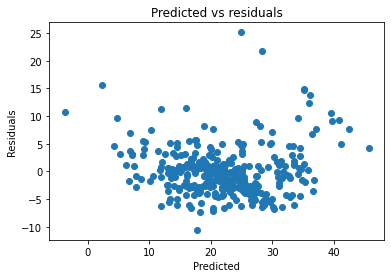

In [37]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

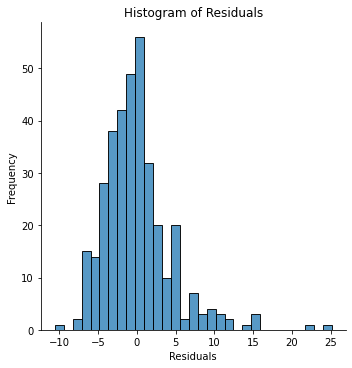

In [38]:
sns.displot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Строим предсказательную модель на тестовой выборке

In [40]:
# Predicting Test data with the model
y_test_pred = lm.predict(x_test)

acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))

R^2: 0.7121818377409195
MAE: 3.8590055923707407
MSE: 30.053993307124127


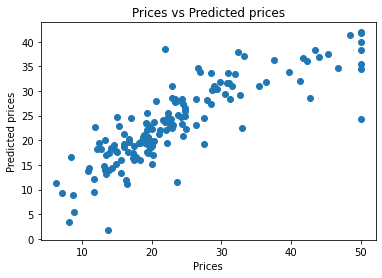

In [41]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

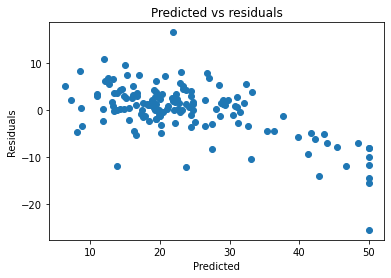

In [42]:
# Checking residuals
plt.scatter(y_test,y_test_pred-y_test)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

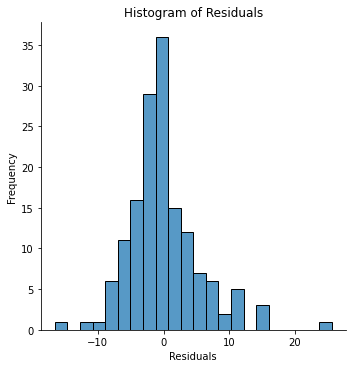

In [43]:
sns.displot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## 1. Далее даем дата-сет, который нам нужно предсказать
## 2. Передаем признаки аналогично X и применяем метод predict нашей модели lm